In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import json
import pandas
from PIL import ImageDraw, Image, ImageFont
from mylib import *

### Load Walsh Values

In [2]:
walsh_path = '../res/walsh.json'

with open(walsh_path) as f:
    s = f.read()
walsh_list = json.loads(s)
walsh = []
for l in walsh_list:
    walsh.append(np.array(l))

## PIL

In [7]:
chars = list(range(ord('A'), ord('Z')+1)) + list(range(ord('a'), ord('z')+1))
chars = [chr(x) for x in chars]
chars += [x for x in '.,!?()[]!@$&1234567890;:\'"']
chars += ['ft','fe','fo'] #characters that are very close to each other

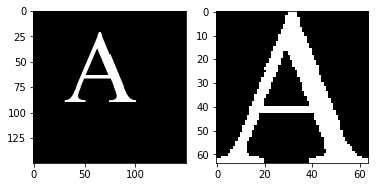

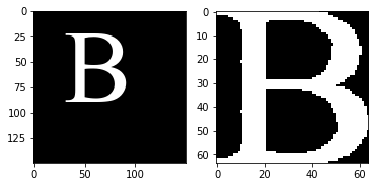

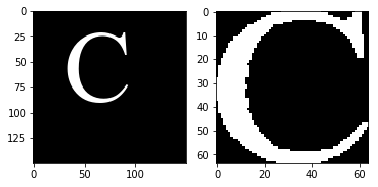

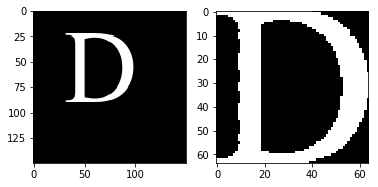

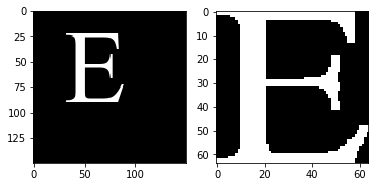

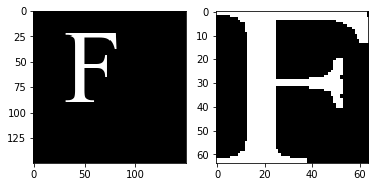

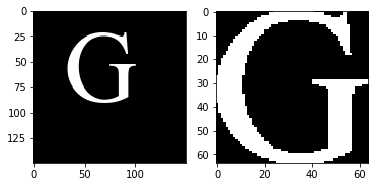

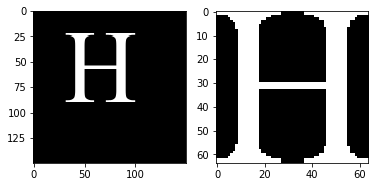

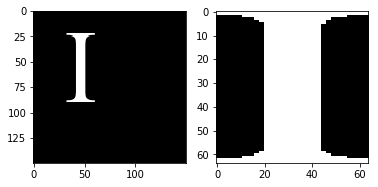

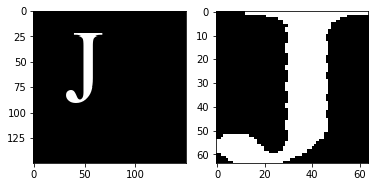

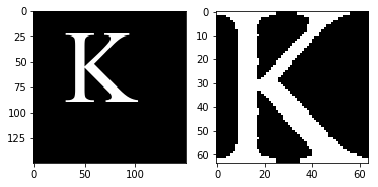

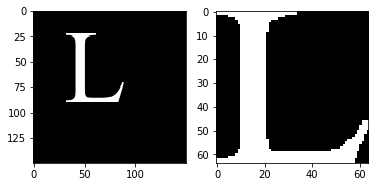

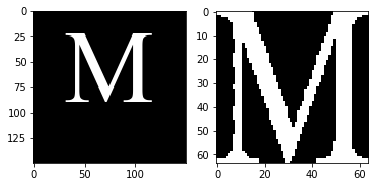

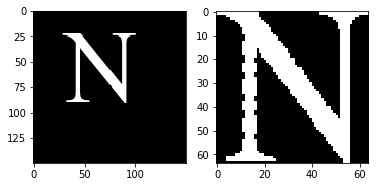

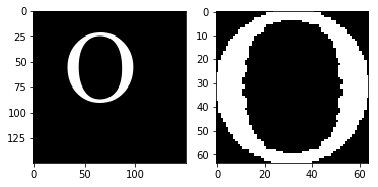

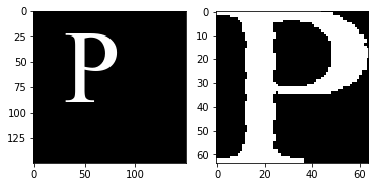

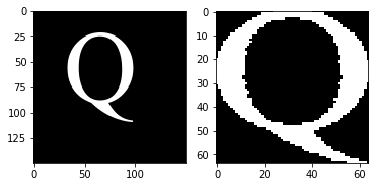

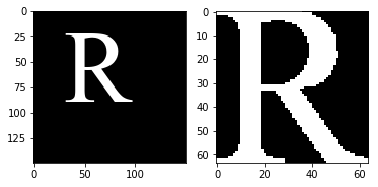

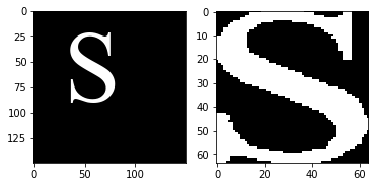

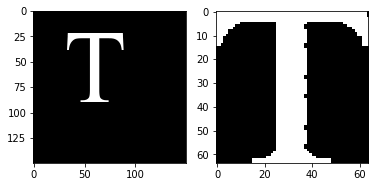

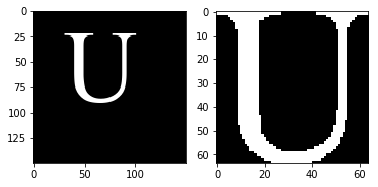

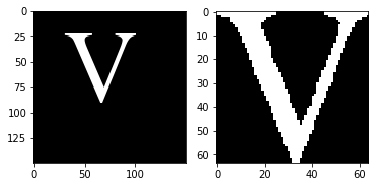

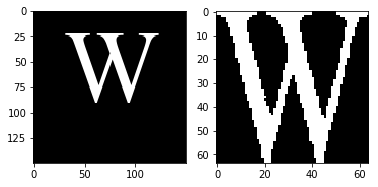

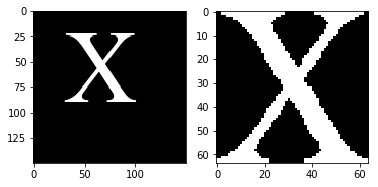

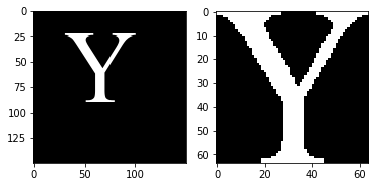

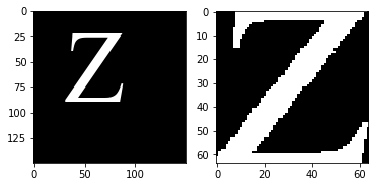

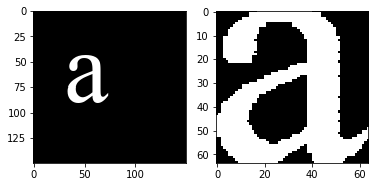

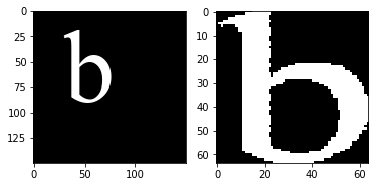

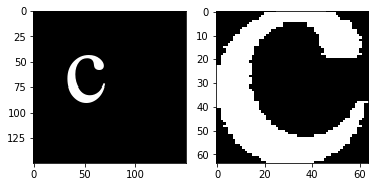

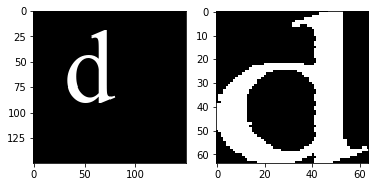

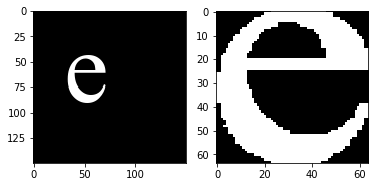

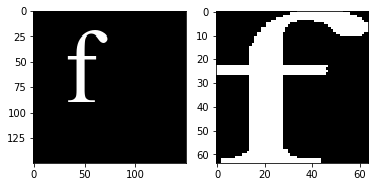

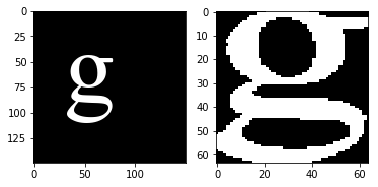

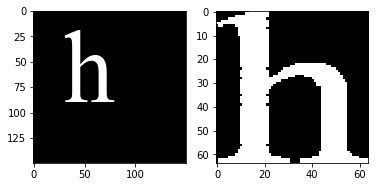

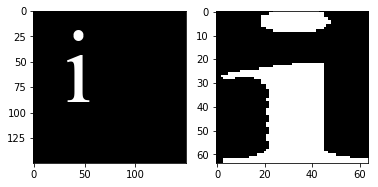

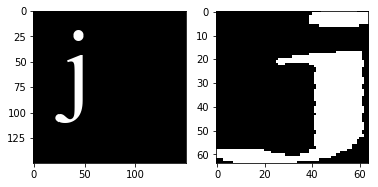

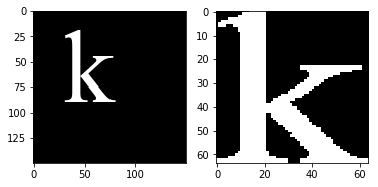

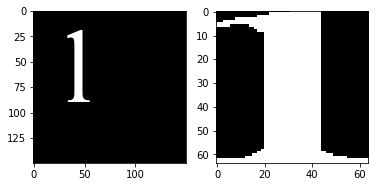

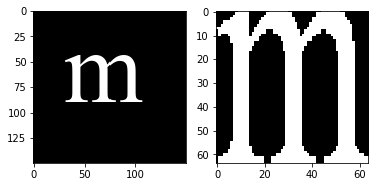

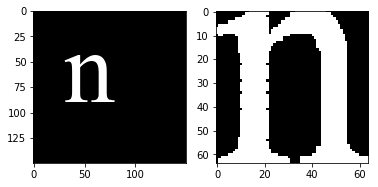

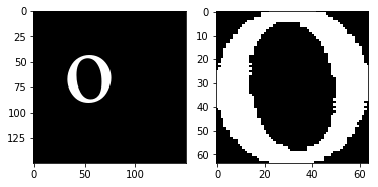

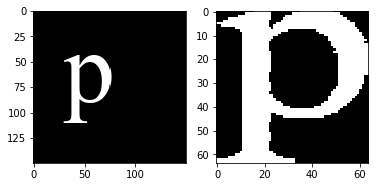

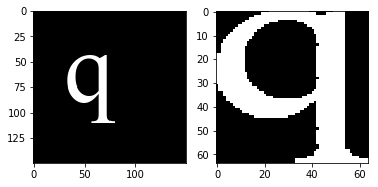

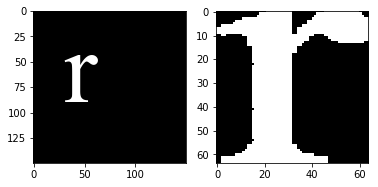

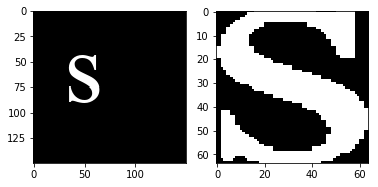

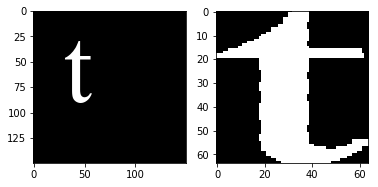

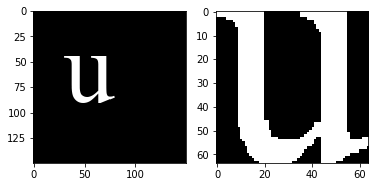

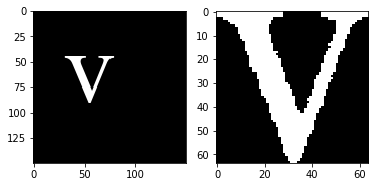

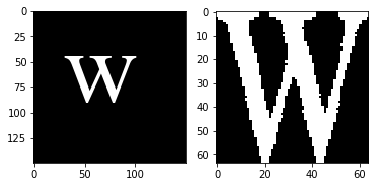

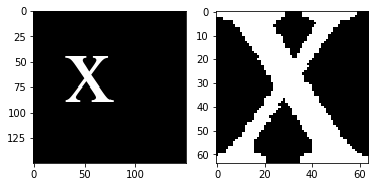

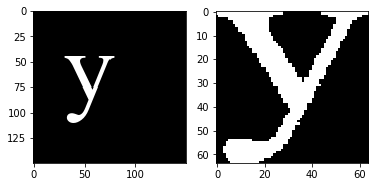

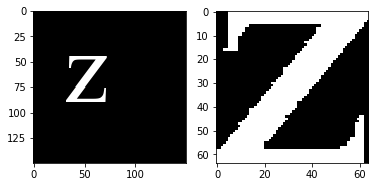

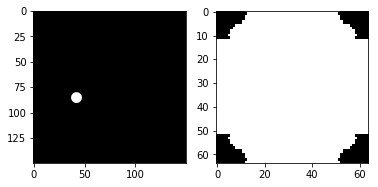

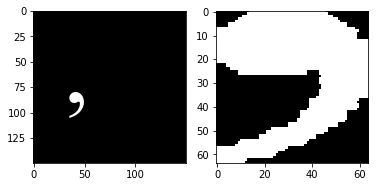

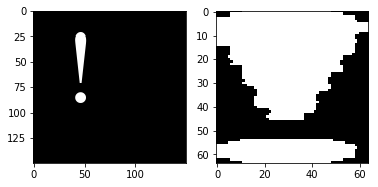

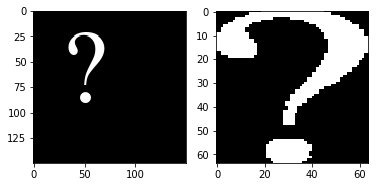

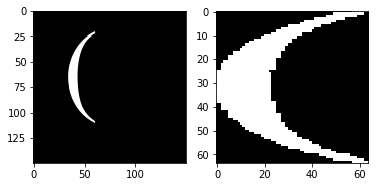

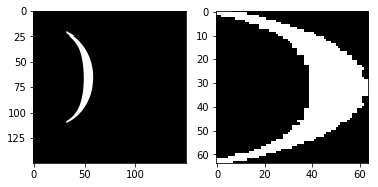

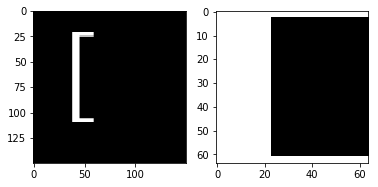

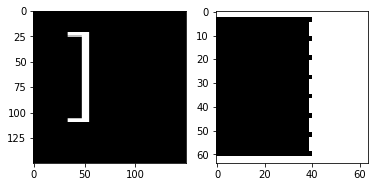

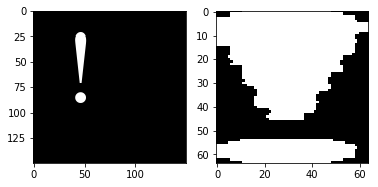

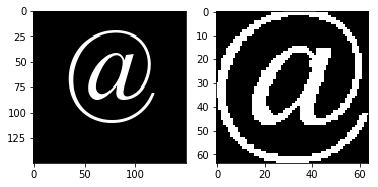

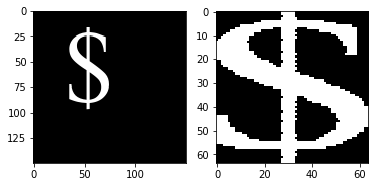

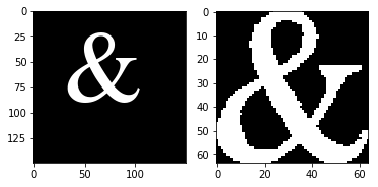

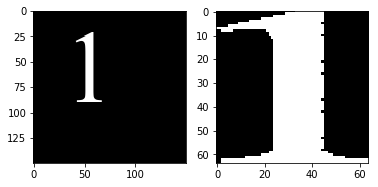

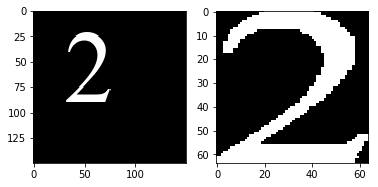

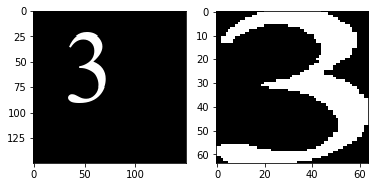

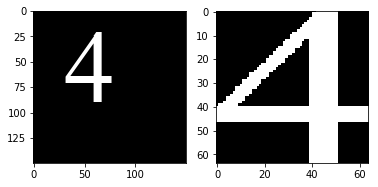

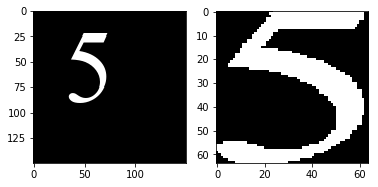

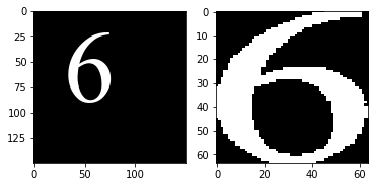

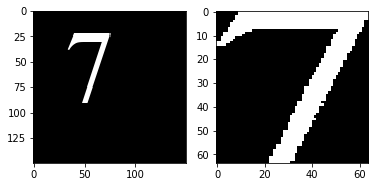

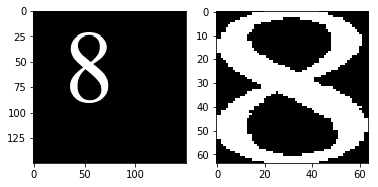

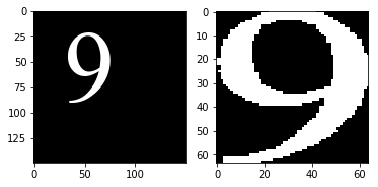

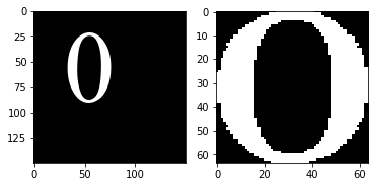

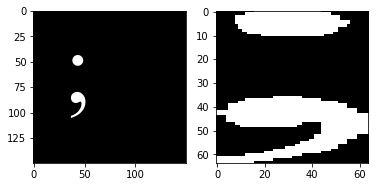

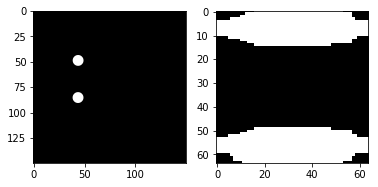

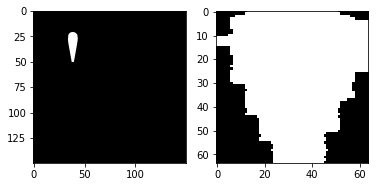

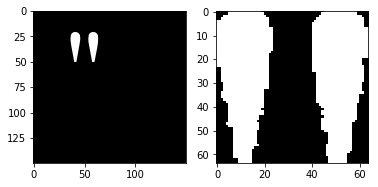

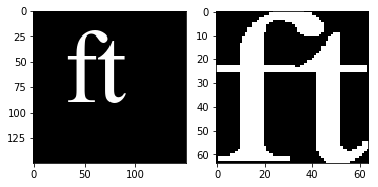

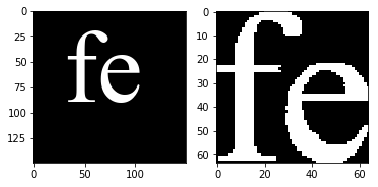

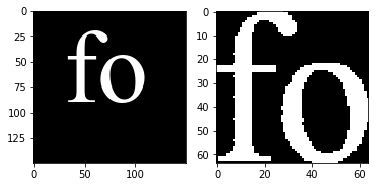

In [8]:
fontsize = 100
img_fraction = 0.5
# # ttf_url = "../fonts-ttf/FreeSans.ttf" #(Ubuntu)
ttf_url = "../res/times.ttf" #(Windows)
font = ImageFont.truetype(ttf_url, fontsize)
letters = []

for c in chars:
    a = np.zeros([150,150],dtype=np.uint16)
    img = Image.fromarray(a,mode='L')
    draw = ImageDraw.Draw(img)
    txt = c

    fontsize = 100
    font = ImageFont.truetype(ttf_url, fontsize)



    draw.text((30,0), txt, font=font, fill=255)

    thresh = 1
    bw = gray_to_bw(np.array(img), thresh)
    bw = bw // np.max(bw)


    lines_vert = vert_seg(bw)

    lines_hor = hor_seg(bw)

    bw = bw[lines_vert[0]['start']:lines_vert[-1]['end'], lines_hor[0]['start']:lines_hor[-1]['end']]

    bw = cv2.resize(bw, (64,64))

    ################ PLOT #################
    plt.figure()
    plt.title(txt)
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.subplot(122), plt.imshow(bw, cmap='gray')
    #######################################

    v = []
    for w in walsh:
        v.append(inner_prod(bw, w))

    data = {'character': txt, 'walsh_vector': v}

    letters.append(data)

In [9]:
with open("../res/database.json", "w") as f:
    f.write(json.dumps(letters, indent=2))